1. This case is about a bank (Thera Bank) which has a growing customer base.

2. Majority of these customers are liability customers (depositors) with varying size of deposits.

3. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this    base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

4. In particular, the management wants to explore ways of converting its liability customers to personal loan customers 

5. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 

6. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success    ratio with minimal budget.

7. Dataset: We are provided with a csv file that contains data on 5000 customers including demographic information (age, income, 
   etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last 
   personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was 
   offered to them in the earlier campaign.

8. Following below we would be analysing the given data and building up a model that will help them identify the potential       
   customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time  
   reduce the cost of the campaign.

Column description and understanding of each attribute:

The columns/attributes given in the dataset are as below:

1.  ID: The variable ID does not add have any interesting information. There is no association between a person's customer ID   
    and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this for our  
    model prediction.
2.  Age: age of the customer
3.  Experience: # years of professional experience
4.  Income: Annual income of the customer in dollars
5.  ZIP Code: Home address zipcode 
6.  Family: family size of the customer
7.  CCAvg: average spending on credit cards per month
8.  Education: education level: 1. Undergrad, 2. Graduate, 3. Advanced/Professional
9.  Mortgage: value of house mortgage, if any
10. Personal Loan: did the customer accept personal loan in last campaign?
11. Securities Account: Does the customer have a securities account with the bank?
12. CD Account: Does the customer have a certificate of deposit account with the bank?
13. Online: Does the customer have internet banking facilities?
14. CreditCard: Does the customer use a credit card?

In [80]:
# importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy import stats

In [59]:
# read the given dataset and get a glance of first five records
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [44]:
data.shape

(5000, 14)

In [45]:
# Dataset has 5000 rows/records with 14 columns
# Checking column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [46]:
# Checking the data description
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [47]:
# Getting number of unique data
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [48]:
# Having a different look at description by transposing
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the initial view on the dataset we can observe that:

1. There are 5000 records/rows with 14 columns

2. We have the below five variables which have binary category:

   Personal Loan : This would be our Target Variable
   Securities Account
   CD Account
   Online
   CreditCard
   
3. We have the below interval variables in the dataset:

   Age
   Experience
   Income
   CCAvg
   Mortgage
   
4. Experience column is showing some negative values, which has to be cleaned up

5. We can also drop the column 'ID', as it is of not much use for us.

In the below code we would be addressing the negative values in the 'Experience' column. Steps as mentioned below:

1. For the record with the ID, get the value of Age column
2. For the record with the ID, get the value of Education column
3. Filter the records matching above condition from the data frame which has records with positive experience & take median
4. Apply the median back to the location which had negative experience

In [49]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [50]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4971.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.243211,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.359189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can now see that the negative values in 'Experience' are now addressed

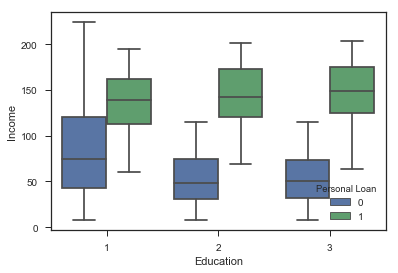

In [51]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

From above plot we can infer the influence of income and education on personal loan
1. Customers who don't have any loans are more as undergraduates
2. Customers who have taken the personal loan (green colour) nearly same income ranges for postgraduate and  
   professional and undergraduates are close but less than them

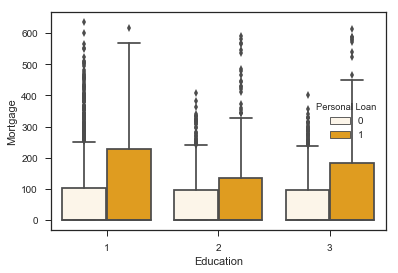

In [52]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='orange')

From above plot we can infer that the customers who have personal loan have high mortgage and most of them are undergraduates

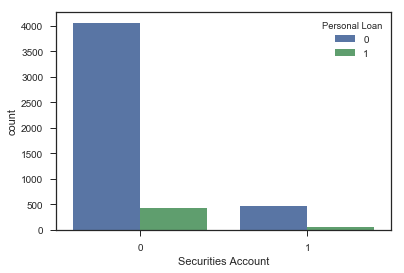

In [53]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

From above plot we can observe that many customers who have loan don't have a securities account

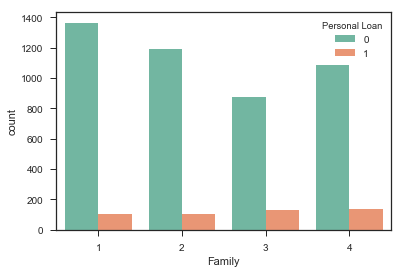

In [54]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set2')

From above plot we can observe that families with size of 3 are more likely to take loan

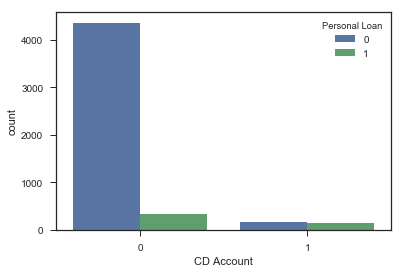

In [55]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')

From above plot we can observe that
1. Majority of customers who don't have any loan also dont have a CD account
2. Majority of customers who have CD account have a loan

In [56]:
top_zipcode = data[data['Personal Loan']==1]['ZIP Code'].value_counts().head(5)
top_zipcode

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

We can see the top 5 locations who have taken personal loan

Below we can see the data distribution:

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0


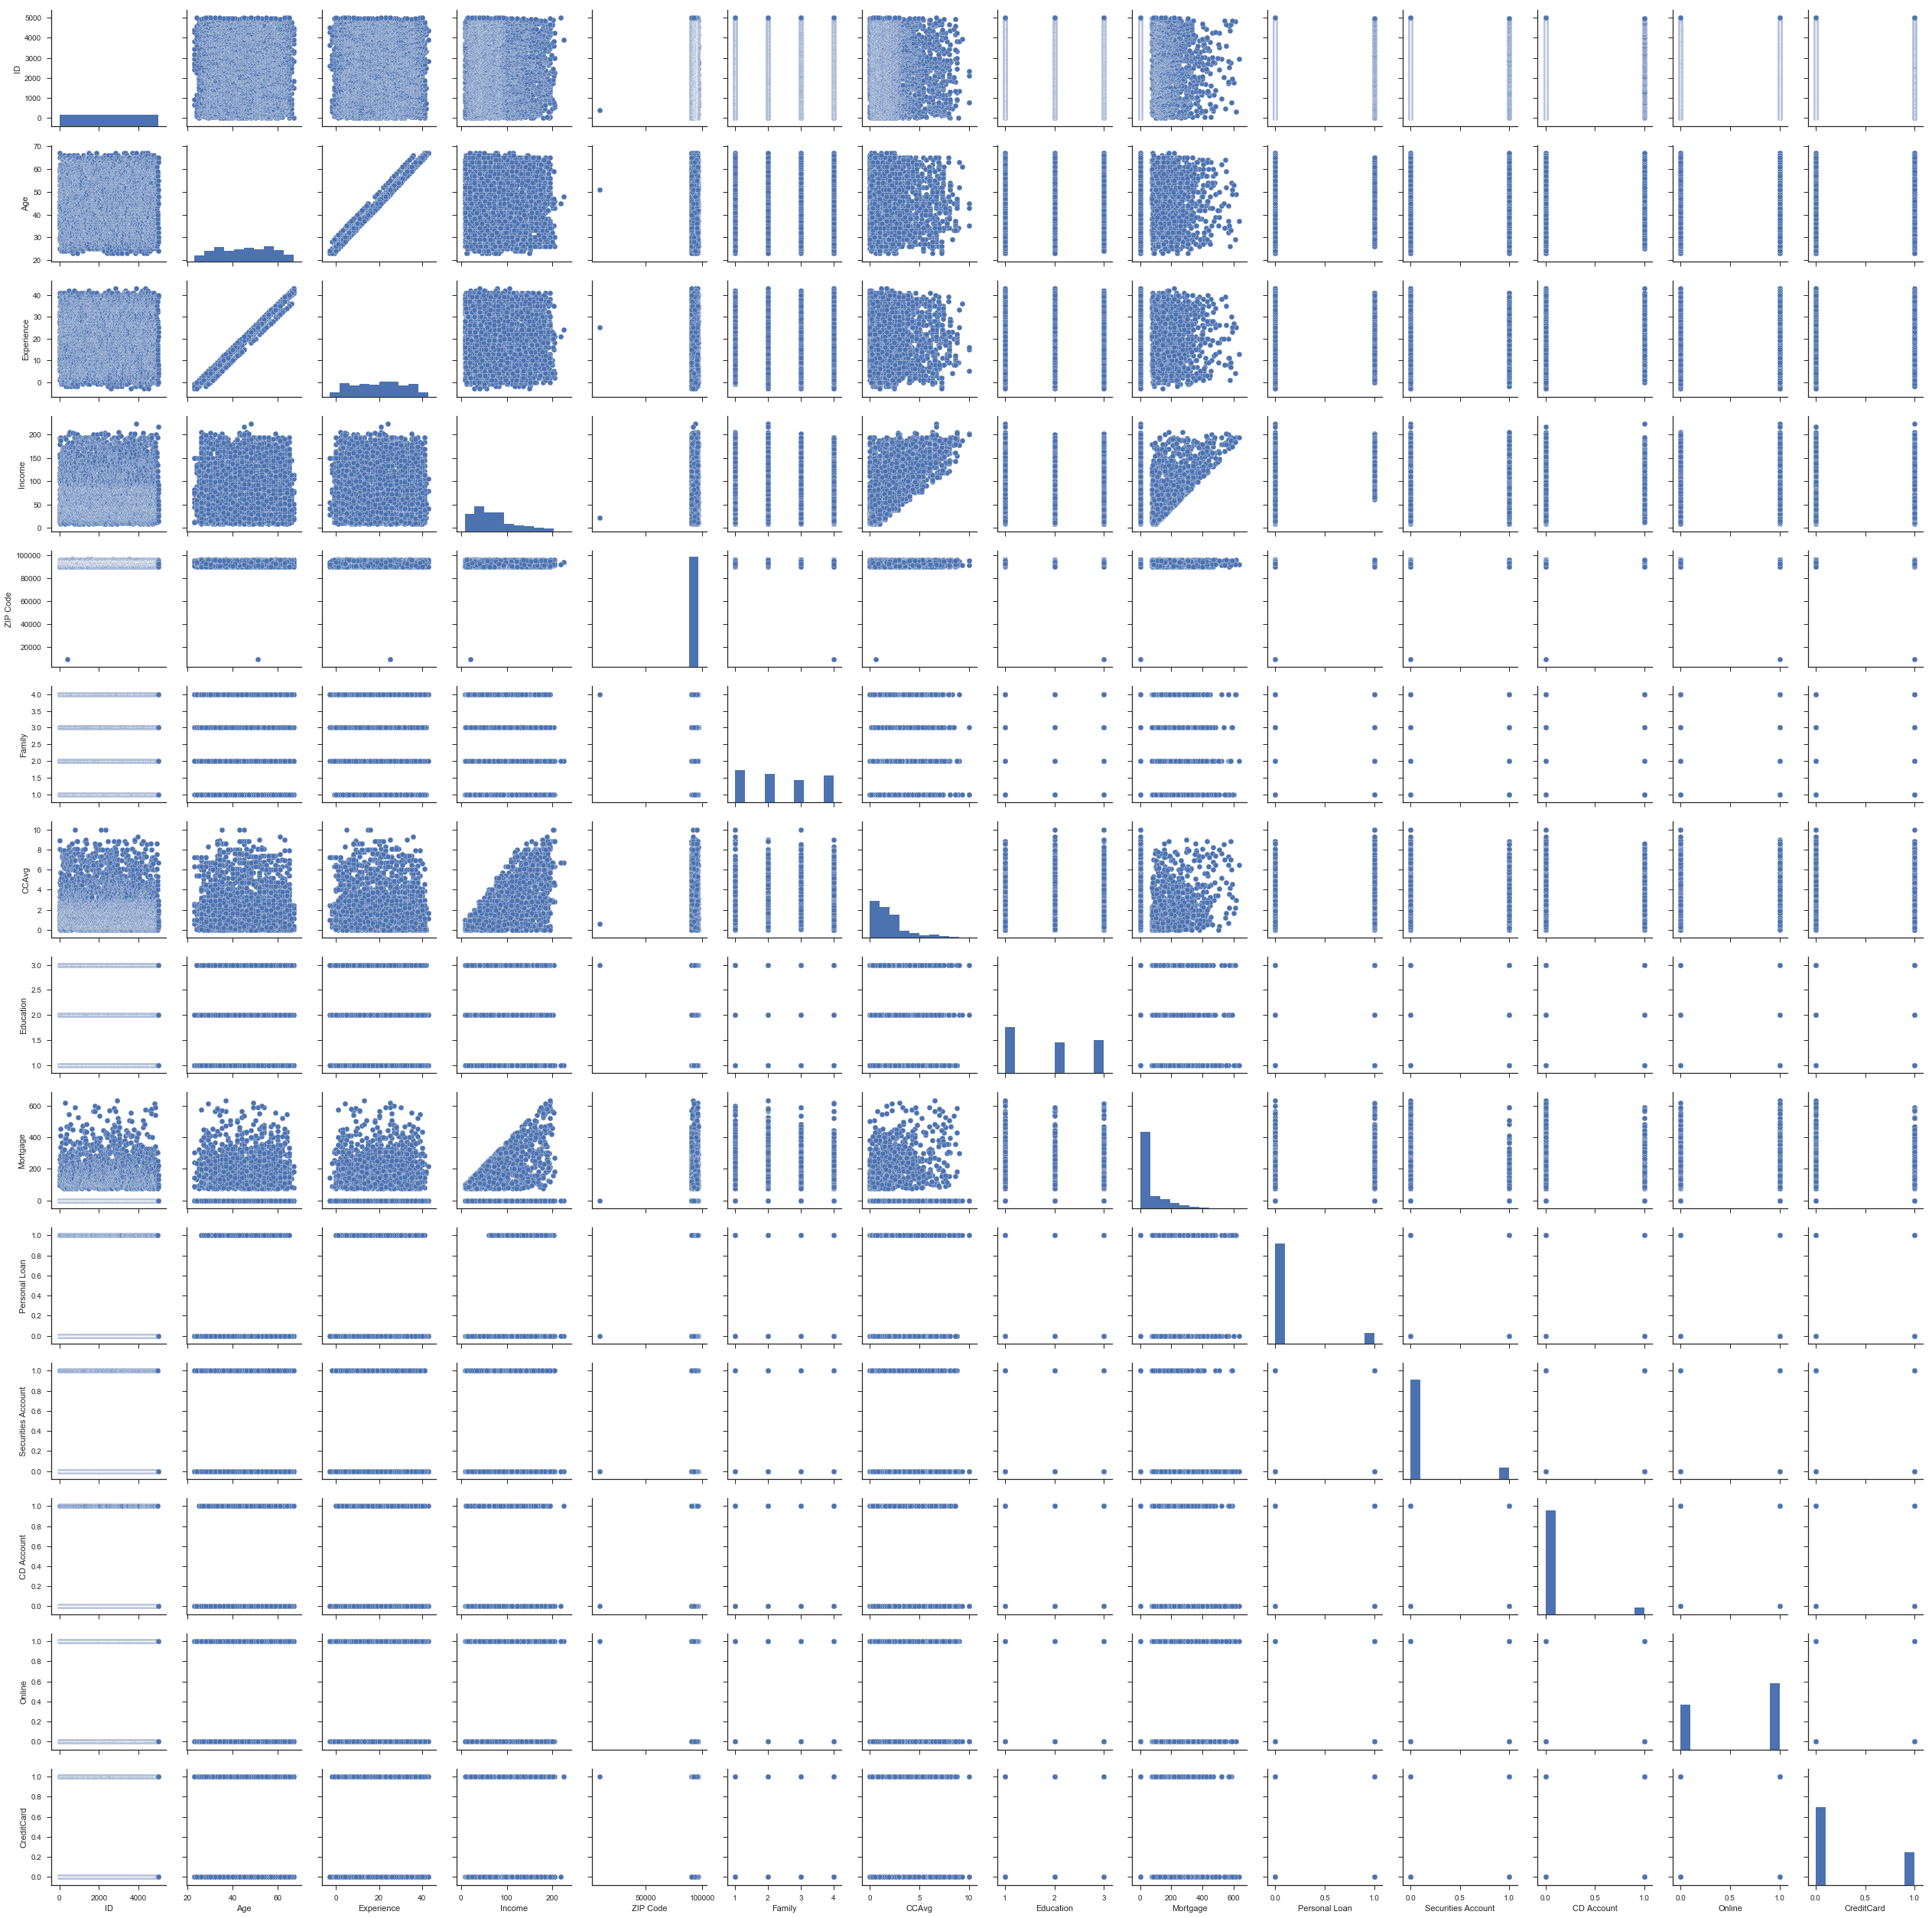

In [62]:
plt = sns.pairplot(data[['ID','Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )
data.head(1)

1. Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age
2. Income is positively skewed. Majority of the customers have income between 45K and 55K
3. CCAvg and CCAvg are positively skewed variable
4. The variables family and education are ordinal variables and family distribution is even
5. Experience is normally distributed 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


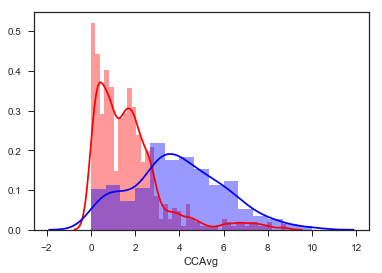

In [66]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'b')

In [71]:
# Credit card spending of customers without any loan:

data[data['Personal Loan'] == 0]['CCAvg'].median()*1000

1400.0

In [72]:
# Credit card spending of customers with loan:

data[data['Personal Loan'] == 1]['CCAvg'].median()*1000

3800.0

The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

Text(0,0.5,'Age')

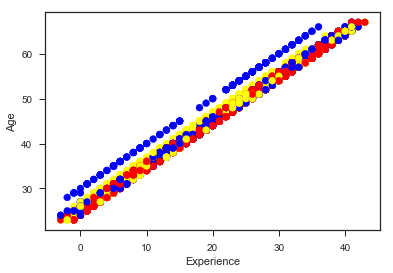

In [81]:
fig, ax = mp.subplots()
colors = {1:'red',2:'yellow',3:'blue'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
mp.xlabel('Experience')
mp.ylabel('Age')

Above plot show that experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also there are more people in the under graduate level

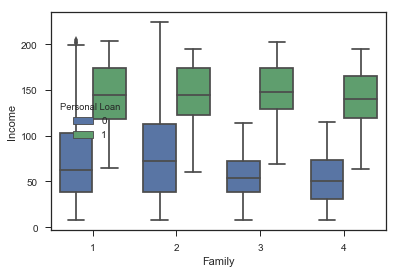

In [84]:
sns.boxplot(x=data['Family'],y=data['Income'],hue=data['Personal Loan'])

From the above plot we can observe that the families with income less than 100K are less likely to take loan,than families with 
high income

Summary of important observations:

1. Families with income less than 100K are less likely to take loan,than families with high income
2. Who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates    a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan
3. From the previous records, customers with zipcode 94720  and 94305 have taken the highest number of loans so far i.e. 19 and    13 respectively.
4. Families with size of 3 are more likely to take loan
5. Customers who have personal loan have high mortgage and most of them are undergraduates
6. Many customers who have loan don't have a securities account
7. Majority of customers who have CD account have a loan
    

Splitting the data into training and test set in the ratio of 70:30 respectively 

In [86]:
# We are spitting the training set to 70% and test set to 30%:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [88]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [99]:
# Description of the training set
train_set.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.398571,73.406571,93165.732571,2.418000,1.927746,1.883143,55.674286,0.102571,0.057714,0.602571,0.300000
std,11.403195,45.784535,1766.179423,1.145273,1.746445,0.840053,99.654904,0.303442,0.233236,0.489436,0.458323
min,23.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,38.750000,91798.500000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93524.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# Description of the test set
test_set.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.198000,74.632000,93121.634000,2.346000,1.961720,1.876000,58.422667,0.108667,0.066667,0.583333,0.280000
std,11.604507,46.614102,2780.614636,1.152028,1.750841,0.839699,106.372324,0.311324,0.249527,0.493171,0.449149
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92009.000000,1.000000,0.670000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,63.000000,93407.000000,2.000000,1.600000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,101.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,218.000000,96651.000000,4.000000,10.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# Naive Bayes Model:

naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [91]:
# Confusion Matrix for Naive Bayes model:

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1234,62
Yes,108,96


In [93]:
# KNN ( K - Nearest Neighbour )
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = data["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [94]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [103]:
# confusion matrix for KNN

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cnf_matrix_logistic = pd.DataFrame(confusion_matrix(Y_Test, predicted).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cnf_matrix_logistic.index.name = 'Predicted'
cnf_matrix_logistic.columns.name = 'True'
cnf_matrix_logistic


True,No,Yes
Predicted,,
No,1359,120
Yes,14,6


In [98]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_Train,Y_Train)
Y_pred=logreg.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, Y_pred)
print(acc)

0.9079386257505003


In [102]:
# confusion matrix for logistic regression model

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cnf_matrix_logistic = pd.DataFrame(confusion_matrix(Y_Test, Y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cnf_matrix_logistic.index.name = 'Predicted'
cnf_matrix_logistic.columns.name = 'True'
cnf_matrix_logistic

True,No,Yes
Predicted,,
No,1328,93
Yes,45,33


Conclusion:

We used Logistic Regression, KNN and Naive Bayes Models and found that they have accuracy of 0.90, 0.91 and 0.88 respectively. Hence we can use the K-Nearest Neighbour model as it gives us the highest accuracy. 